In [28]:
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
df = pd.read_excel('data/tasks.xlsx', sheet_name='initial_data', parse_dates=['date'])
df

,userId,date,trafficSource,cost,value
0,user_9996,2020-01-10,facebook / video,10.25,157.5
1,user_9995,2020-01-03,telegram / posts,15.75,0.0
2,user_9995,2020-01-19,yandex / cpc,8.50,0.0
3,user_9992,2020-01-02,google / cpc,8.25,0.0
4,user_999,2020-01-01,facebook / video,10.25,0.0
...,...,...,...,...,...
9995,user_1003,2020-01-08,yandex / cpc,8.50,0.0
9996,user_1002,2020-01-01,telegram / posts,15.75,0.0
9997,user_10000,2020-01-15,yandex / cpc,8.50,0.0
9998,user_10000,2020-01-17,google / cpc,8.25,0.0


In [15]:
new_df = df[['trafficSource', 'cost', 'value']].groupby('trafficSource').agg('sum')
new_df

,cost,value
trafficSource,,
facebook / video,28208.00,33735.0
google / cpc,25137.75,42557.5
telegram / posts,35374.50,29330.0
vk / display,4498.75,4345.0
yandex / cpc,14025.00,21377.5


In [26]:
f_sr = lambda x: x.unique().size
nnndf = df[['trafficSource', 'userId']].groupby('trafficSource').agg(f_sr)


new_df['ROI'] = new_df['value'] / new_df['cost']
new_df['dohod'] = new_df['value'] - new_df['cost']

new_df['users'] = df[['trafficSource', 'userId']].groupby('trafficSource').agg(f_sr)
new_df['dohod_per_user'] = new_df['dohod'] / new_df['users']

new_df.sort_values('ROI', ascending=False, inplace=True)
new_df

,cost,value,ROI,dohod,users,dohod_per_user
trafficSource,,,,,,
google / cpc,25137.75,42557.5,1.692972,17419.75,2654,6.563583
yandex / cpc,14025.00,21377.5,1.524242,7352.50,1518,4.843544
facebook / video,28208.00,33735.0,1.195937,5527.00,2410,2.293361
vk / display,4498.75,4345.0,0.965824,-153.75,300,-0.512500
telegram / posts,35374.50,29330.0,0.829128,-6044.50,2009,-3.008711


In [27]:
google_users = df[df['trafficSource'] == 'google / cpc']['userId'].unique().size
yandex_users = df[df['trafficSource'] == 'yandex / cpc']['userId'].unique().size
facebook_users = df[df['trafficSource'] == 'facebook / video']['userId'].unique().size
vk_users = df[df['trafficSource'] == 'vk / display']['userId'].unique().size
telegram_users = df[df['trafficSource'] == 'telegram / posts']['userId'].unique().size
print(google_users, yandex_users, facebook_users, vk_users, telegram_users)

2654 1518 2410 300 2009


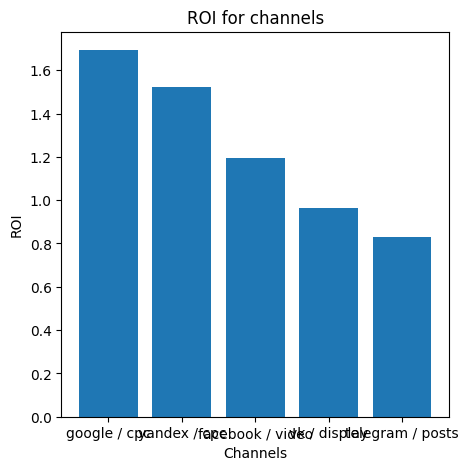

In [29]:
plt.figure(figsize=(5, 5))
plt.bar(new_df.index, new_df['ROI'])
plt.xlabel('Channels')
plt.ylabel('ROI')
plt.title('ROI for channels')
plt.show()